### 포물선 운동

* 물체가 운동방향과 나란하지 않은 방향으로 힘을 받을 때의 운동 
* 수평으로는 등속운동을 하고
* 수직으로는 가속도(중력가속도)운동을 한다.
* 이를 프로그래밍으로 확인해보자.

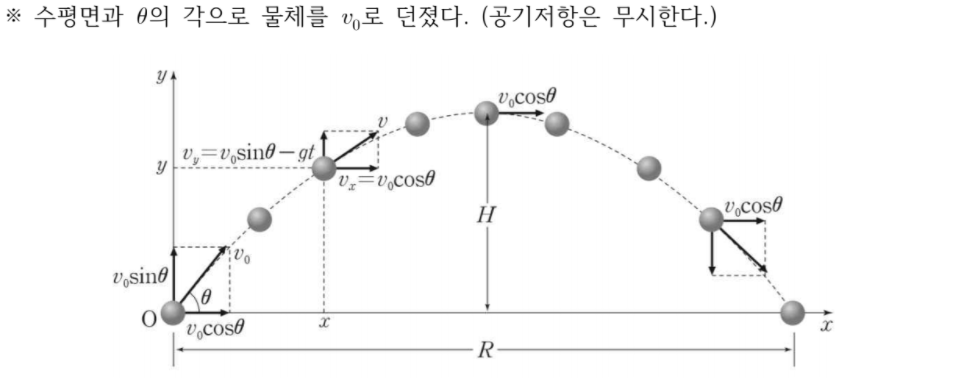

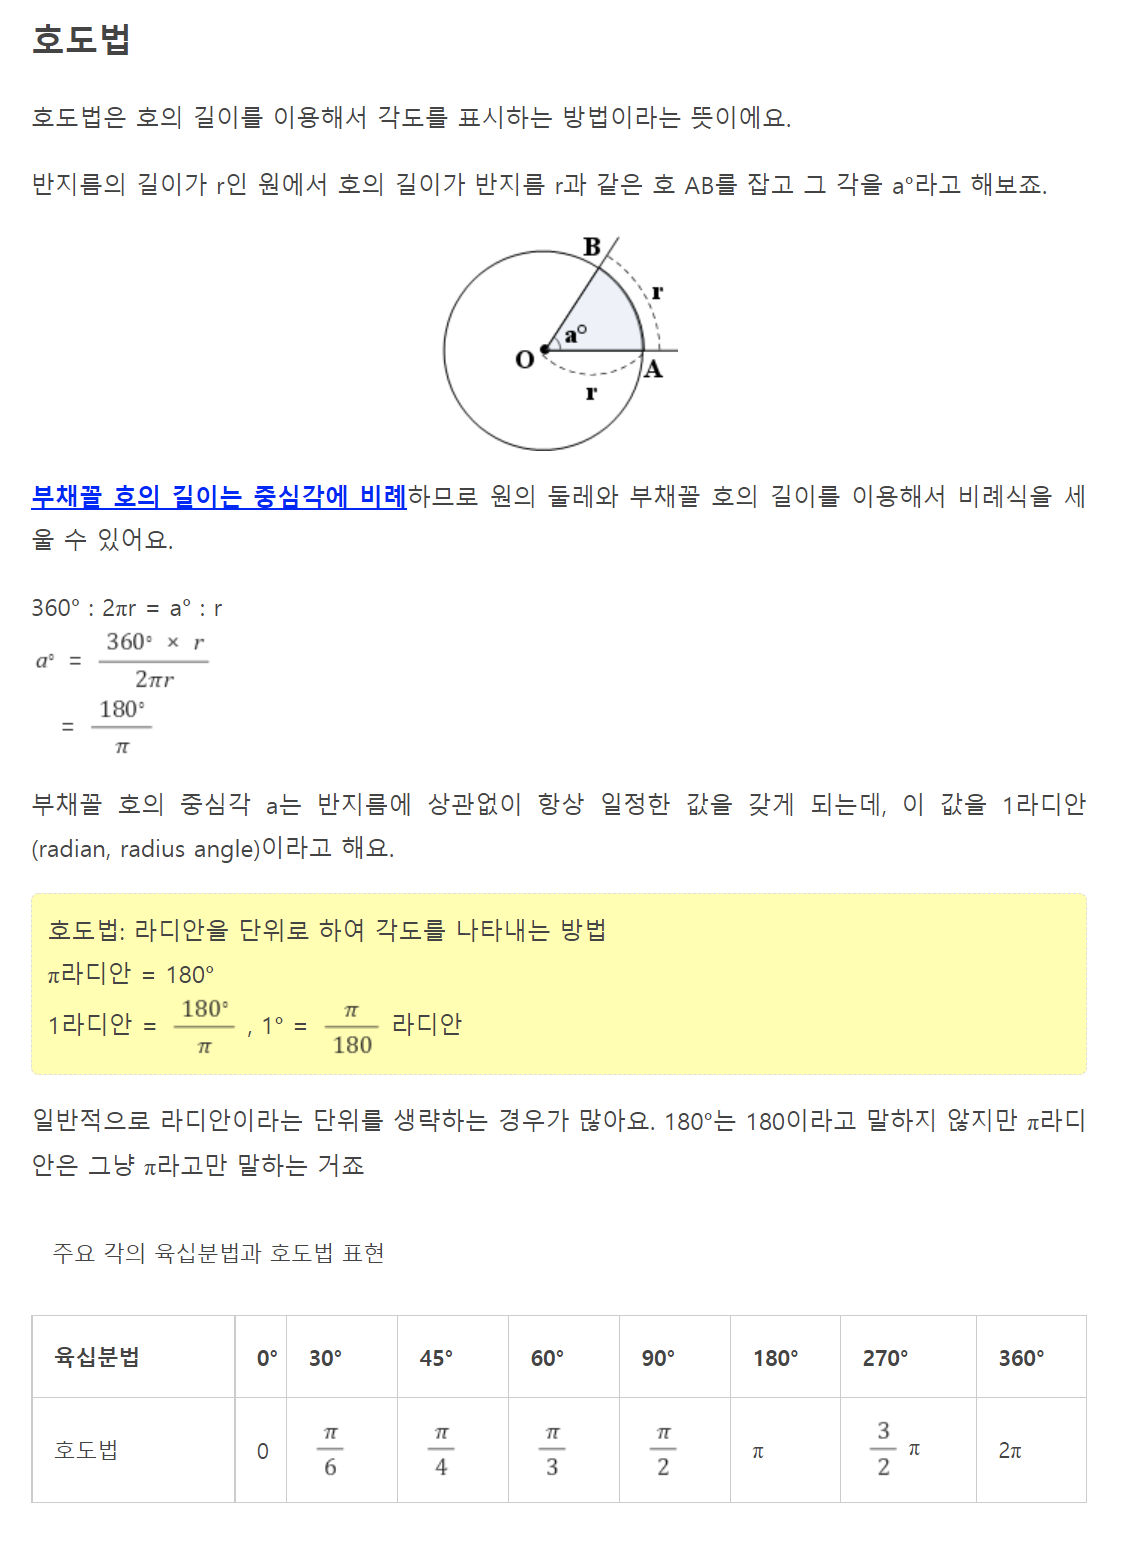

### 바닥과 공 그리고 특성!

* 먼저 바닥과 공을 만들어보자
* 그리고 이를 기반으로 공의 특성을 정의해보자

In [ ]:
GlowScript 3.1 VPython

ground = box(position = vector(0,0,0),size=vector(30,0.25,1.5), color = color.green) #30는 길이, 0.25는 높이 ,1.5는 너비
print(ground.pos.y)

ball = sphere(pos=vector(-15,0.425,0), radius=0.3,color=color.red)
print(ball.pos)

ball.m = 0.2 #공의 질량 
theta = 30*pi/180 #theta 발사각의 각도 몇 도일까?
v0 = 10
v=vector(cos(theta),sin(theta),0) #속도v # x축과 y축은 무엇이 들어갈까?
ball.p = ball.m*v0*v #운동량 p = mv

### 포물선 운동!
- 포물선 운동 움직임을 만들어주기 위해서는
- 물체의 속도 변화량인 가속도를 반영해서 속도를 업데이트(갱신)해주어야 하고
- 물체의 위치를 구하는 공식을 통해 위치를 업데이트(갱신)해주어야 한다.

In [ ]:
GlowScript 3.1 VPython

ground = box(position = vector(0,0,0),size=vector(30,0.25,1.5), color = color.green) #30는 길이, 0.25는 높이 ,1.5는 너비
ball = sphere(pos=vector(-15,0.425,0), radius=0.3,color=color.red,make_trail=True)

g = vector(0,-9.8,0) #물체의 중력가속도
ball.m = 2  #공의 질량 2
v0 = 10  #초기 속도 10
theta = pi/  #발사각도 45도 ( (pi/180) * 45)

ball.velocity = v0*vector((theta),(theta),0) #물체의 속도


t = 0 #전체 시간
dt = 0.01 #시간의 변화량 

while t<3: #300번의 움직임 3 / 0.01 
    rate(100) #1/100 0.01초마다 움직임 반영
    
    ball.velocity = ball.velocity+g*dt #중력 가속도에 따른 공의 속도 변화 
    ball.pos = ball.pos + dt*ball.velocity  #공의 움직인 거리 
    t=t+dt #시간 증가
    
    print(ball.velocity) #공의 속도 출력

### 포물선 운동의 조건을 입력하면 이에 따른 포물선 운동을 출력하도록 코드를 수정해보자.

- 포물선 운동의 움직임에 영향을 미치는 요소는 무엇이 있을까?
- 질량, 중력가속도, 초기속도, 발사각
- 이를 입력받으면 이를 반영하여 움직임을 출력해주는 프로그램을 만들어보자.

In [ ]:
GlowScript 3.1 VPython

ground = box(position = vector(0,0,0),size=vector(30,0.25,1.5), color = color.green) #30는 길이, 0.25는 높이 ,1.5는 너비
ball = sphere(pos=vector(-15,0.425,0), radius=0.3,color=color.red,make_trail=True)


input_m = 0 #질량 
input_v = 0 #초기 속도 
input_degree = 0 #각도 

g = vector(0,-9.8,0) #물체의 중력가속도

input_m = (input("질량을 입력하세요"))
ball.m = input_m #공의 질량

input_v = (input("초기 속도를 입력하세요"))
v0 = input_v #초기 속도

input_degree = (input("발사각도를 입력하세요"))
theta = input_degree* pi/180 #발사각도

ball.velocity = v0*vector(cos(theta),sin(theta),0) #물체의 속도

t = 0
dt = 0.01

while t<3: #300번의 움직임 3 / 0.01 
    rate(100) #1/100 0.0.1초마다 움직임 반영
    
    ball.velocity = ball.velocity+ #가속도에 따른 공의 속도 변화 
    ball.pos = ball.pos + dt*ball.velocity  #공의 움직인 거리 
    t=t+dt #시간 증가
    
    print(ball.velocity) #공의 속도 출력

### 종료 조건을 바꿔보자

- 시간을 종료 조건으로 두는 것이 아니라
- 위치를 기준으로 종료 조건을 만들어보자 
- 바닥에 있는 판(길이가 작으면 길이도 늘려주고)의 상판 부분보다 작아지면 멈추도록 조건을 줘보자.

In [ ]:
GlowScript 3.1 VPython

ground = box(position = vector(0,0,0),size=vector(30,0.25,1.5), color = color.green) #30는 길이, 0.25는 높이 ,1.5는 너비
ball = sphere(pos=vector(-15,0.425,0), radius=0.3,color=color.red,make_trail=True)

max_h = 0.0
max_t = 0.0


input_m = 0
input_v = 0
input_degree = 0

g = vector(0,-9.8,0) #물체의 중력가속도

input_m = int(input("질량을 입력하세요"))
ball.m = input_m #공의 질량

input_v = int(input("초기 속도를 입력하세요"))
v0 = input_v #초기 속도

input_degree = int(input("발사각도를 입력하세요"))
theta = input_degree* pi/180 #발사각도

ball.velocity = v0*vector(cos(theta),sin(theta),0) #물체의 속도


t = 0
dt = 0.01

while ball.pos.y > 0.125  : #공의 y축 위치가 중심에서 0.125위에 있는 공의 상판부분보다 클 때 까지 움직이다가 크지 않으면 멈춤
    rate(100) #1/100 0.0.1초마다 움직임 반영
    
    ball.velocity = ball.velocity+g*dt #가속도에 따른 공의 속도 변화 
    ball.pos = ball.pos + dt*ball.velocity  #공의 움직인 거리 
    t=t+dt #시간 증가
    
    if ball.velocity.y >=0 and ball.velocity.y <=0.1 : #공의 속도가 0이상이고 0.1이하일 때
        max_h = ball.pos.y
        max_t = t
    
    print(ball.velocity) #공의 속도 출력

print("최고점 도달 시간 : ",max_t,"최고점 : ",max_h)
    


### 물체를 가장 멀리 던질 수 있는 각은 몇 도일까?

- 우리가 하나하나 테스트를 해도 좋지만 너무 귀찮다.
- 1도부터 90도까지 반복적으로 공을 던져보고 
- 가장 공을 멀리 던질 수 있는 각도를 구해보자.
- 이미지 텍스처 : https://imgur.com/

* 그 전에 도지(?)를 통통 튀게 해보자.

In [ ]:
GlowScript 3.1 VPython

ground = box(position = vector(0,-.2,0),size=vector(10,.4,2), color = color.green)
ball = sphere(pos=vector(-5,.1,0), radius=1,color=color.yellow,make_trail=True,texture="https://i.imgur.com/81qyN1y.jpeg")

g = vector(0,-9.8,0) #물체의 질량
ball.m = 2
v0 = 10
theta = pi/4
ball.velocity = v0*vector(cos(theta),sin(theta),0)


t = 0
dt = 0.01

while (1):
    rate(100)
    
    ball.velocity = ball.velocity+g*dt
    ball.pos = ball.pos + dt*ball.velocity
    t=t+dt
    
    if ball.pos.y <0:
        ball.velocity.y = ball.velocity.y #공이 튕기면 반대 방향으로 만들어줌
    
    print(ball.velocity)

### 0도부터 90도까지 반복되는 도지 통통!

- 0도부터 90도까지 반복해서 공을 생성하고
- 공이 y축 0이상인동안까지 포물선 운동을 반복하고
- 종료되면 x축의 거리를 측정하자
- x축의 거리가 기존보다 크면 거리를 업데이트 해주고
- 그 떄의 각도를 저장 한 후 
- 90도까지 다 돌고 난 다음의 결과를 확인한다.

In [ ]:
GlowScript 3.1 VPython

ground = box(position = vector(0,-.2,0),size=vector(10,.4,2), color = color.green)

max_gac = 0
max_val = -3.14
g = vector(0,-9.8,0) #물체의 질량


for i in range(): #1도부터 90도까지 테스트 하려면 몇번 반복?
    ball = sphere(pos=vector(-5,.1,0), radius=1,color=color.red,make_trail=True,texture="https://i.imgur.com/81qyN1y.jpeg")
    ball.m = 2
    v0 = 100
    theta = (i+1)*pi/180 #왜 i+1일까? 
    ball.p = ball.m*v0*vector(cos(theta),sin(theta),0) #물체의 운동량 p = mv
    ball.velocity = v0*vector(cos(theta),sin(theta),0)


    t = 0
    dt = 0.01

    while (ball.pos.y>=0): #왜 조건을 0 이상으로 주었을까?
        rate(10000) #0.0001초 간격
    
        ball.velocity = ball.velocity+g*dt
        ball.pos = ball.pos + dt*ball.velocity
        t=t+dt
    
    
    if (ball.pos.x > max_val):
        max_val = ball.pos.x
        max_gac = i+1
        
    print(i+1,"도 완료",ball.pos.x)
print(max_gac, max_val)
    
    

### 그래서 지금까지 물체를 만들고 운동(등속, 가속도, 포물선)을 3차원 공간에서 만들어 보았습니다.

- 지금까지 학습한 내용을 토대로 여러분들의 세계에 물체를 만들고 물리법칙을 부여해봅시다.
- 키보드 조작 기능을 활용한다면 간단한 게임 역시 만들 수 있습니다.
- 여러분들이 만들 수 있는 세상이고
- 물리와 정보의 가능성을 맘껏 느낄 수 있었던 시간이면 좋겠습니다 :)